# Exploring Water Use data
## Annual Water Use

In [34]:
import os, sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import leafmap
import configparser
from scipy import stats
from scipy.stats import norm


%matplotlib widget
%matplotlib inline
%matplotlib ipympl

In [2]:
#m = leafmap.Map(center=(40, -100), zoom=5)
#m

This notebook is used to summarize data exploration for the water use project. To simplify the reproducability of the result, the external files needed to run the notebook correctly are saved in a configuration file.

In [3]:
config = configparser.ConfigParser()
config_file = r"C:\work\water_use\ml_experiments\annual_v_0_0\config_file.ini"
config.read(config_file)

fidr = open(config_file, 'r')
file_content = fidr.readlines()
fidr.close()
[print(line) for line in file_content]

[General]

Date = 7/31/2021

Model_name = wu_an_0

Type = Annual

Version = 0.0



[Files]

Workspace = C:\work\water_use\ml_experiments\annual_v_0_0

Train_file = C:\work\water_use\mldataset\ml\training\train_datasets\Annual\wu_annual_training.csv

Prediction_file = C:\work\water_use\mldataset\ml\training\train_datasets\Annual\wu_annual_predict.csv

Log_File = ml_log.log



[Target]

target_field = wu_rate



[Features]

features_info_file = C:\work\water_use\ml_experiments\annual_v_0_0\features_status.xlsx

ForwardX11 = no



[Basic Water Need]

Human_survival = 1.0

Min_indoor_wu = 14.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [6]:
# read files
workspace = config.get("Files", "Workspace")
train_file = config.get("Files", "Train_file")
target = config.get("Target", "target_field")

In [5]:
df_main = pd.read_csv(train_file)
df_train = df_main[df_main['wu_rate'] > 0]
df_train

C:\anaconda\envs\ml\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (163) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,is_swud,population,households2,income_lt_10k,income_10K_15k,income_15k_20k,income_20k_25k,income_25k_30k,income_30k_35k,income_35k_40k,...,state_id,KG_climate_zone,zill_nhouse,LotSizeSquareFeet_sum,YearBuilt_mean,BuildingAreaSqFt_sum,TaxAmount_mean,NoOfStories_mean,bdg_ftp_count,bdg_ftp_gt2median
10,1.0,1989.268767,131.647092,0.052026,0.053691,0.048976,0.016238,0.009209,0.072842,0.054444,...,25,26.0,543.0,16918764.0,1928.307978,846924.0,2898.823204,1.749057,899.0,77.0
31,1.0,5772.314587,1846.042352,0.019636,0.031197,0.044613,0.054641,0.022838,0.066263,0.020405,...,23,26.0,3614.0,202206961.0,1966.221870,6932128.0,4783.700554,1.753405,3775.0,710.0
52,5.0,1609.025674,535.573916,0.020321,0.038210,0.028977,0.021699,0.027331,0.050272,0.035395,...,25,26.0,688.0,70296272.0,1956.848485,1319807.0,5743.835756,1.678466,869.0,127.0
115,7.0,110.457080,119.466409,0.053245,0.042730,0.024751,0.051017,0.025344,0.044836,0.018793,...,25,26.0,70.0,4489244.0,1934.079365,130464.0,5828.646154,1.830769,294.0,99.0
157,1.0,57.303487,17.043416,0.028942,0.018782,0.033672,0.040905,0.037707,0.045776,0.062613,...,33,26.0,135.0,11031736.0,1907.134328,254265.0,5882.103704,1.820896,212.0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417241,1.0,5.355180,3.412846,0.103384,0.051047,0.048311,0.061390,0.064781,0.040272,0.049677,...,38,26.0,83.0,5454584.0,NaN,NaN,327.155786,NaN,326.0,28.0
417242,1.0,5.410594,3.447148,0.092923,0.045202,0.051099,0.056797,0.063142,0.051824,0.047286,...,38,26.0,83.0,5454584.0,NaN,NaN,327.155786,NaN,326.0,28.0
417243,1.0,5.474165,3.468727,0.075156,0.046183,0.058164,0.055901,0.067612,0.051945,0.044559,...,38,26.0,83.0,5454584.0,NaN,NaN,327.155786,NaN,326.0,28.0
417259,3.0,39.102603,14.424455,0.058944,0.066382,0.073812,0.064322,0.048693,0.096601,0.035645,...,27,26.0,528.0,3478701.4,1975.000000,NaN,1977.128219,NaN,851.0,100.0


In [7]:
# Generale look into the data
df_train.describe()

,is_swud,population,households2,income_lt_10k,income_10K_15k,income_15k_20k,income_20k_25k,income_25k_30k,income_30k_35k,income_35k_40k,...,state_id,KG_climate_zone,zill_nhouse,LotSizeSquareFeet_sum,YearBuilt_mean,BuildingAreaSqFt_sum,TaxAmount_mean,NoOfStories_mean,bdg_ftp_count,bdg_ftp_gt2median
count,78961.000000,7.896100e+04,7.896100e+04,78961.000000,78961.000000,78961.000000,78961.000000,78961.000000,78961.000000,78961.000000,...,78961.000000,78961.000000,7.717400e+04,7.531800e+04,70143.000000,7.015800e+04,7.163600e+04,59494.000000,7.858900e+04,78589.000000
mean,1.215986,1.690272e+04,6.080549e+03,0.070290,0.060630,0.059247,0.058945,0.057399,0.056904,0.052405,...,36.701726,18.343397,4.548443e+03,1.021798e+09,1965.730176,1.519341e+07,2.787669e+03,1.368402,4.955693e+03,513.687284
std,2.976647,1.347030e+05,4.982169e+04,0.047370,0.036676,0.032785,0.030771,0.029598,0.028395,0.026326,...,14.699148,6.914230,2.749962e+04,1.780667e+11,38.338458,8.053363e+08,3.099595e+04,0.599011,2.818603e+04,3095.613438
min,0.000000,5.930000e-05,1.690000e-05,0.000000,0.000000,-0.000468,0.000000,-0.000021,0.000000,0.000000,...,1.000000,0.000000,1.000000e+00,7.150000e+02,184.291729,1.000000e+00,1.370000e+00,1.000000,1.000000e+00,0.000000
25%,0.000000,2.457500e+01,6.692642e+00,0.036505,0.033853,0.035906,0.037408,0.037586,0.038303,0.035447,...,25.000000,14.000000,1.270000e+02,4.260694e+06,1951.635918,1.486380e+05,7.331091e+02,1.083855,1.810000e+02,11.000000
50%,1.000000,2.617474e+02,4.028599e+01,0.060012,0.055208,0.055239,0.055918,0.054386,0.054324,0.049838,...,42.000000,14.000000,4.680000e+02,1.465231e+07,1969.877678,6.081390e+05,1.313033e+03,1.255579,6.110000e+02,53.000000
75%,1.000000,3.066732e+03,8.328510e+02,0.092946,0.080519,0.077298,0.075494,0.072386,0.071199,0.065129,...,48.000000,25.000000,1.718750e+03,5.184350e+07,1985.272727,2.592993e+06,2.613927e+03,1.511321,2.035000e+03,207.000000
max,125.000000,9.061658e+06,3.323759e+06,0.454596,0.345089,0.304784,0.312221,0.307505,0.429443,0.352826,...,56.000000,29.000000,1.275696e+06,4.872222e+13,2020.000000,8.695480e+10,2.007420e+06,25.151038,1.495509e+06,188862.000000


In [8]:
# Multiple steps were followed to clean population. So the final population feild is defined here
pop_field = 'TPOPSRV'

C:\anaconda\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\anaconda\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


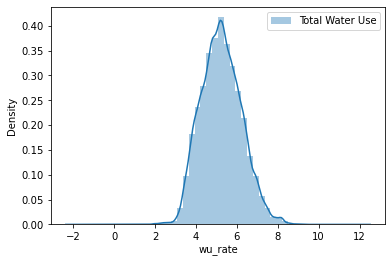

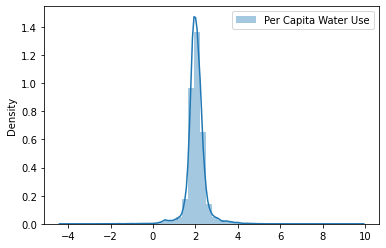

In [15]:
plt.figure()
sns.distplot(np.log10(df_train[target]), label = 'Total Water Use')
plt.legend()
plt.figure()
sns.distplot(np.log10(df_train[target]/df_train[pop_field]), label = 'Per Capita Water Use')
plt.legend()

Some of the "per capita values" are very extreme, which might indicate some outliers in WU or population. For now, let us remove exteme 1% values. 

C:\anaconda\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    76586.000000
mean       135.594522
std        122.555100
min          3.857393
25%         70.890098
50%        103.756650
75%        158.710192
max       1170.048417
dtype: float64

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
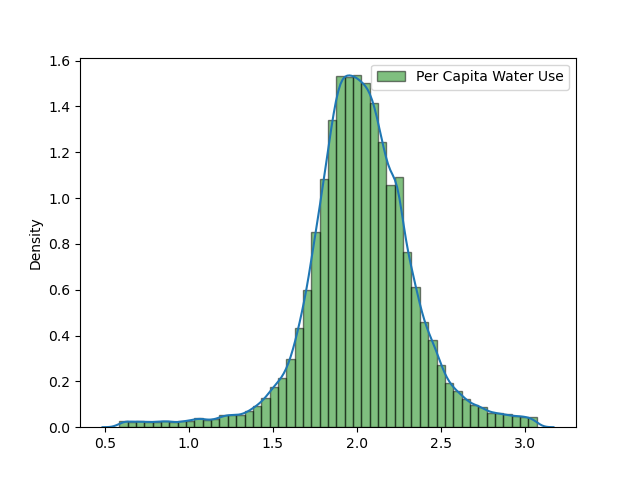

In [35]:
trimed_per_capita = np.log10(df_train[target]/df_train[pop_field])
low_0_01 = trimed_per_capita.quantile(0.01)
top_0_98 = trimed_per_capita.quantile(0.98)
trimed_per_capita = trimed_per_capita[trimed_per_capita >= low_0_01]
trimed_per_capita = trimed_per_capita[trimed_per_capita <=top_0_98]
sns.distplot(trimed_per_capita, label = 'Per Capita Water Use',  hist_kws={ "linewidth": 1,
                            "alpha": 0.5, "color": "g", "edgecolor" : 'black'})
plt.legend()
np.power(10,trimed_per_capita).describe()

### Water Use vs. Population
Notice that some population values are less than 1. This is becuase the census data collector issue.

C:\Users\AALZRA~1\AppData\Local\Temp\2/ipykernel_43292/1099441817.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_["Log10 Population"] = np.log10(db_[pop_field])
C:\Users\AALZRA~1\AppData\Local\Temp\2/ipykernel_43292/1099441817.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_["Log10 Water Use (Gallon)"] = np.log10(db_['wu_rate'])


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
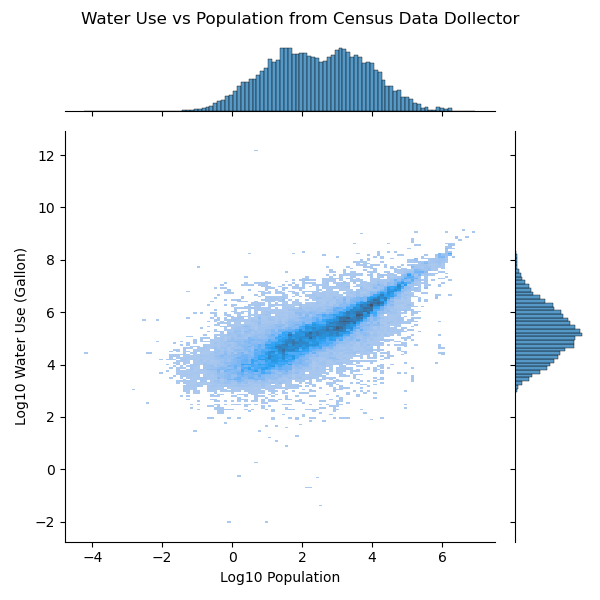

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
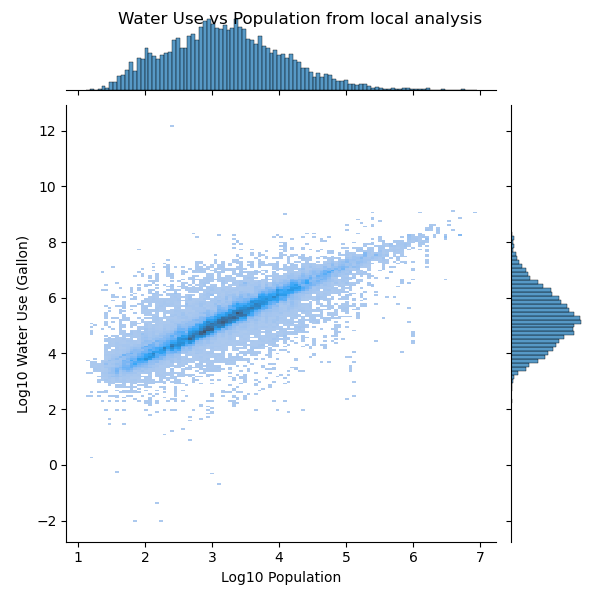

In [36]:
db_ = df_train
db_ = db_[db_['population']>0]
db_["Log10 Population"] = np.log10(db_['population'])
db_["Log10 Water Use (Gallon)"] = np.log10(db_['wu_rate'])
ax1 = sns.jointplot(data=db_, x="Log10 Population", y="Log10 Water Use (Gallon)",  marginal_kws=dict(bins=100), kind="hist")#.set_title('lalala')
ax1.fig.suptitle("Water Use vs Population from Census Data Dollector")
ax1.fig.tight_layout()

#local population data
db_ = df_train
db_ = db_[db_[pop_field]>0]
db_["Log10 Population"] = np.log10(db_[pop_field])
db_["Log10 Water Use (Gallon)"] = np.log10(db_['wu_rate'])
ax2 = sns.jointplot(data=db_, x="Log10 Population", y="Log10 Water Use (Gallon)",  marginal_kws=dict(bins=100), kind="hist")
ax2.fig.suptitle("Water Use vs Population from local analysis")
ax1.fig.tight_layout()


### Exploring population density
* Errors in population can stem from errors in the service area boundary. 
* The following figure indicate that population density can reach unreasonable values (1 million in km2), the error can be in population value or service area.
* An average population density is $900$ persons in $km^2$. Densities above 2500 ( greater than Q95) is likely outliers.
* Very low density is possible. low 1% percentile is equivelent to 8 persons in km2.  

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
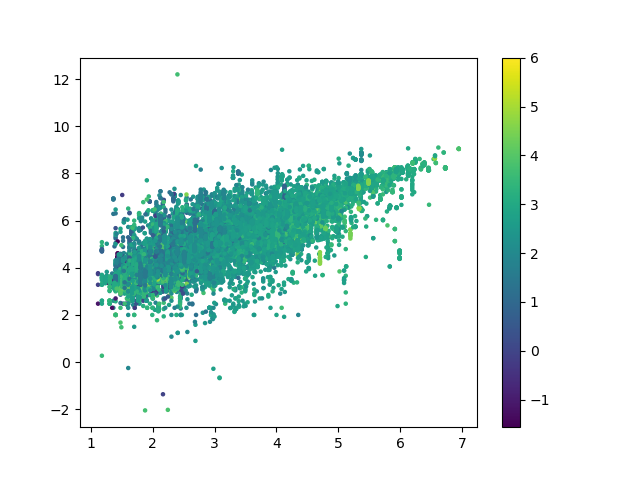

In [47]:
db_ =df_train
plt.figure()
plt.scatter(np.log10(db_[pop_field]), np.log10(db_['wu_rate']), c = np.log10(db_[pop_field]/db_['WSA_SQKM']), s = 5)
plt.colorbar()
plt.show()


count    7.895600e+04
mean     9.016027e+02
std      4.423360e+03
min      2.712513e-02
25%      2.315611e+02
50%      4.470979e+02
75%      8.156749e+02
max      1.007282e+06
dtype: float64

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
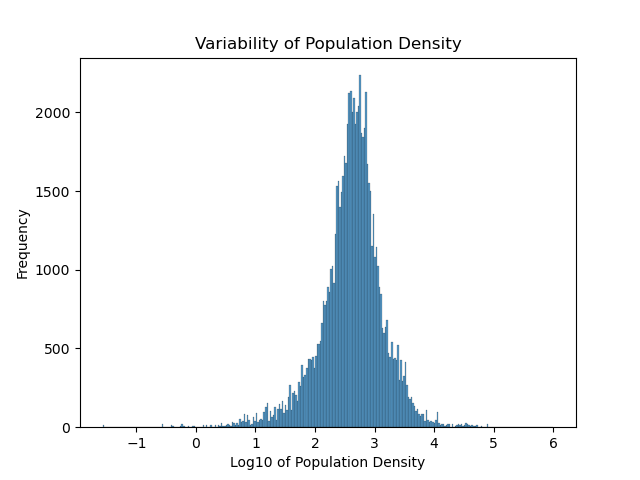

In [55]:
plt.figure()
pop_density = np.log10(db_[pop_field]/db_['WSA_SQKM'])
#plt.hist(pop_density, bins = 100);
sns.histplot(pop_density)
plt.xlabel("Log10 of Population Density")
plt.ylabel("Frequency")
plt.title("Variability of Population Density")
np.power(10,pop_density).describe()


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
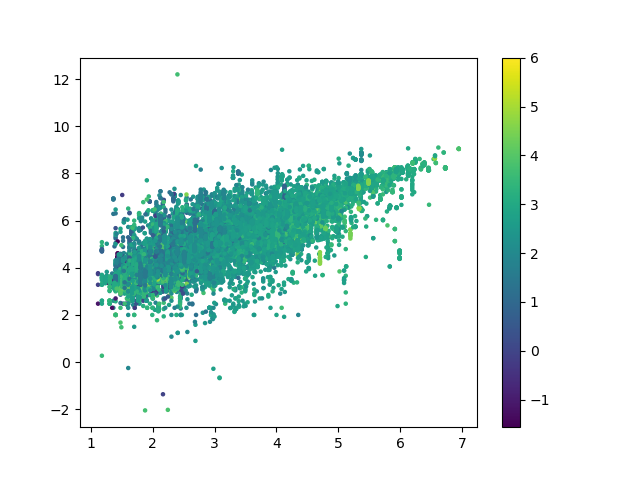

### Categorical Variables


#### Water use by HUC2

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
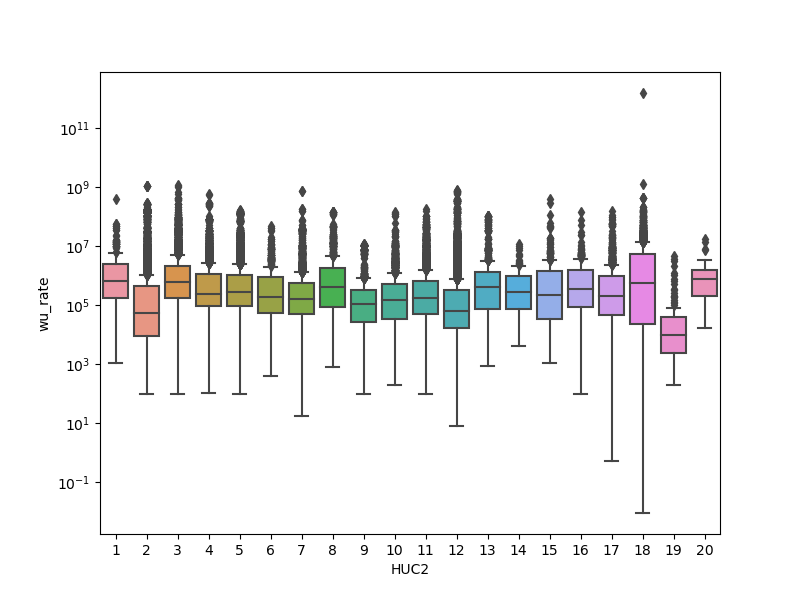

In [68]:
var = 'HUC2'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y=target, data=df_train)
ax.set_yscale('log')

C:\Users\AALZRA~1\AppData\Local\Temp\2/ipykernel_43292/3177333091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['_pc_'] = df_train[target]/df_train[pop_field]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
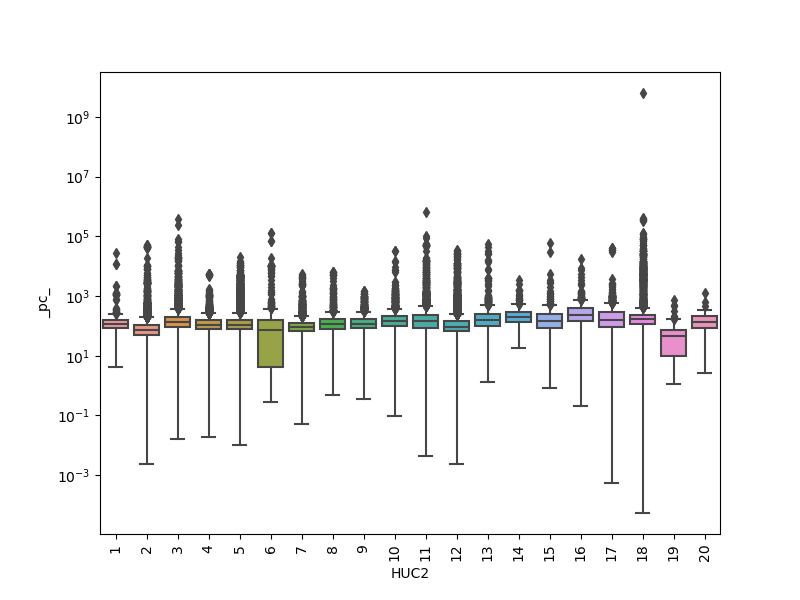

In [72]:
var = 'HUC2'
f, ax = plt.subplots(figsize=(8, 6))
df_train['_pc_'] = df_train[target]/df_train[pop_field]
fig = sns.boxplot(x=var, y='_pc_', data=df_train)
ax.set_yscale('log');
plt.xticks(rotation=90);

#### Per Capita Water use by State

C:\Users\AALZRA~1\AppData\Local\Temp\2/ipykernel_43292/4229850588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['_pc_'] = df_train[target]/df_train[pop_field];


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
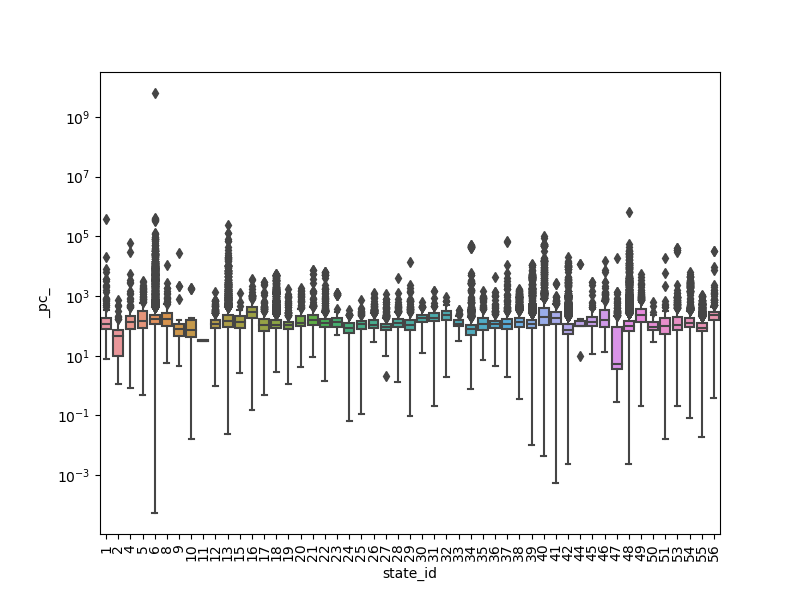

In [71]:
var = 'state_id'
f, ax = plt.subplots(figsize=(8, 6))
df_train['_pc_'] = df_train[target]/df_train[pop_field];
fig = sns.boxplot(x=var, y='_pc_', data=df_train);
ax.set_yscale('log');
plt.xticks(rotation=90);

#### Affect of climate on Per Capita WU

C:\Users\AALZRA~1\AppData\Local\Temp\2/ipykernel_43292/4070766004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['_pc_'] = df_train[target]/df_train['TPOPSRV']


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
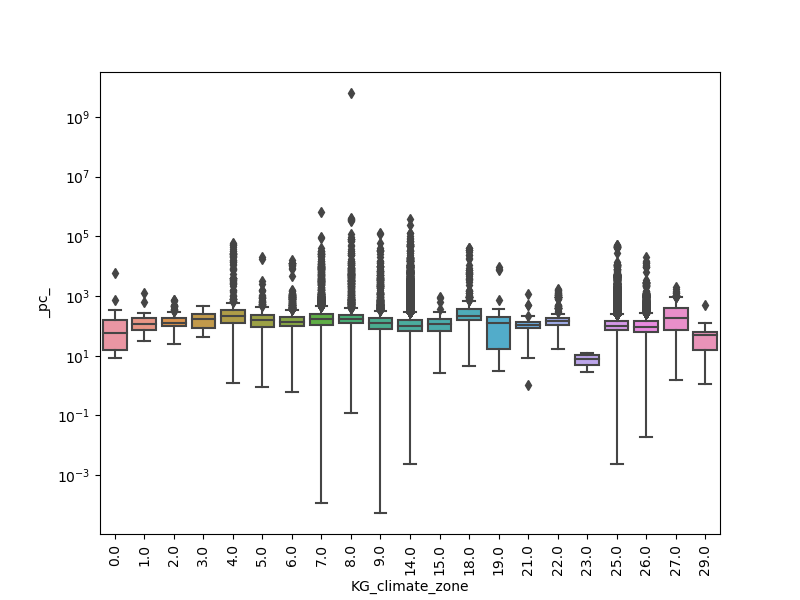

In [73]:
var = 'KG_climate_zone'
f, ax = plt.subplots(figsize=(8, 6))
df_train['_pc_'] = df_train[target]/df_train['TPOPSRV']
fig = sns.boxplot(x=var, y='_pc_', data=df_train)
ax.set_yscale('log');
plt.xticks(rotation=90);

C:\Users\AALZRA~1\AppData\Local\Temp\2/ipykernel_43292/1409762902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['_log_pc_'] = np.log10(df_train['_pc_']);
C:\anaconda\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\anaconda\envs\ml\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
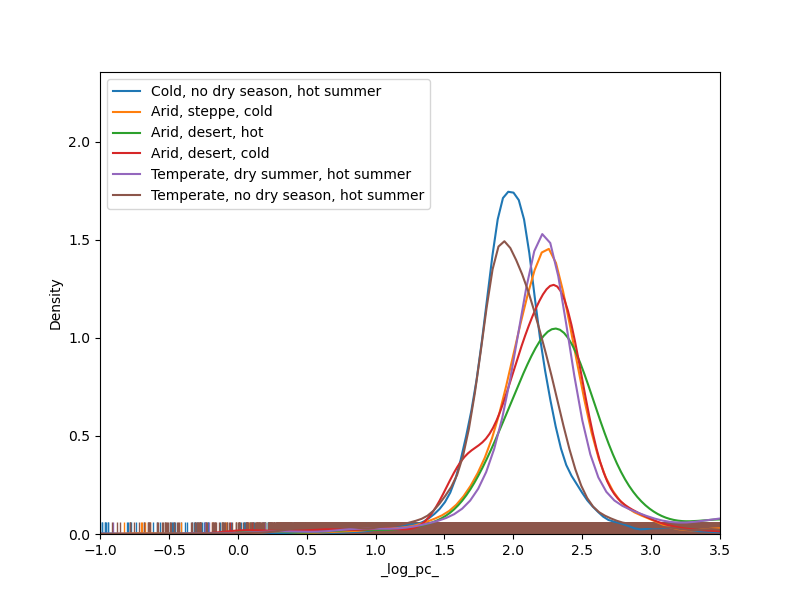

In [78]:
df_train['_log_pc_'] = np.log10(df_train['_pc_']);

pc25 = df_train[df_train['KG_climate_zone'] == 25]['_log_pc_'];
pc14 = df_train[df_train['KG_climate_zone'] == 14]['_log_pc_'];
pc7 = df_train[df_train['KG_climate_zone'] == 7]['_log_pc_'];
pc4 = df_train[df_train['KG_climate_zone'] == 4]['_log_pc_'];
pc8 = df_train[df_train['KG_climate_zone'] == 8]['_log_pc_'];
pc5 = df_train[df_train['KG_climate_zone'] == 5]['_log_pc_'];
f, ax = plt.subplots(figsize=(8, 6))
sns.distplot(pc25, label= 'Cold, no dry season, hot summer', rug=True, hist=False)
sns.distplot(pc7, label= 'Arid, steppe, cold', rug=True, hist=False)
sns.distplot(pc4,  label='Arid, desert, hot', rug=True, hist=False)
sns.distplot(pc5, label = 'Arid, desert, cold ', rug=True, hist=False)
sns.distplot(pc8,  label= 'Temperate, dry summer, hot summer ', rug=True, hist=False)
sns.distplot(pc14,  label= 'Temperate, no dry season, hot summer', rug=True, hist=False)
plt.xlim([-1, 3.5])
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
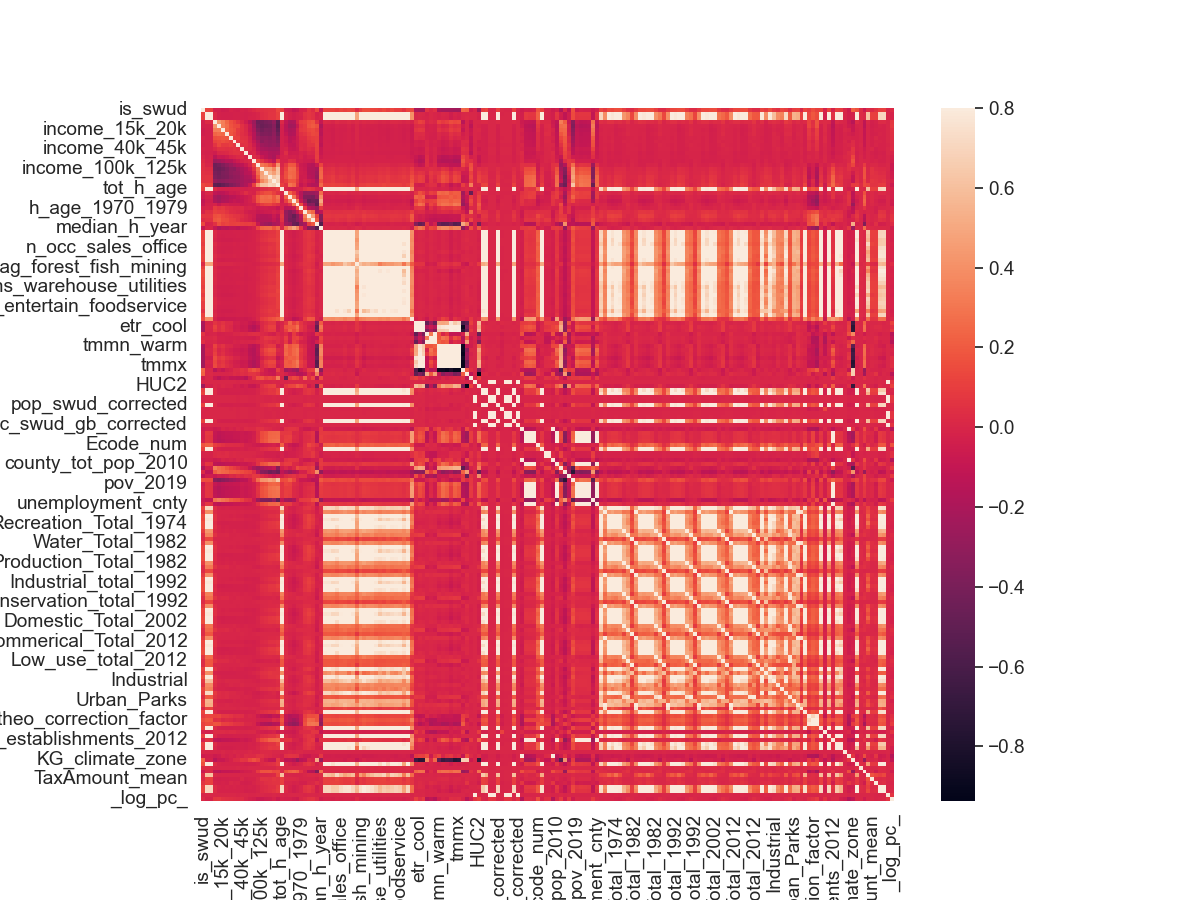

In [81]:

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
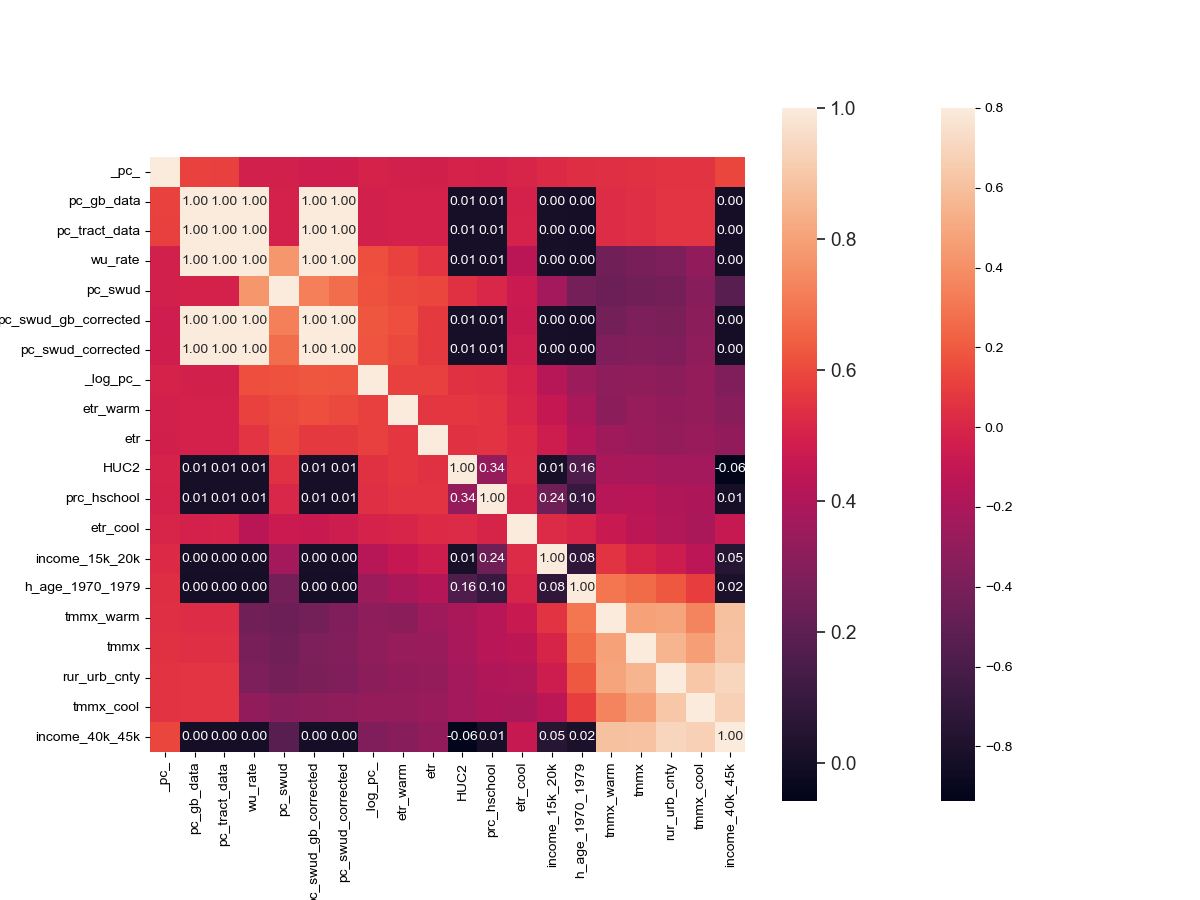

In [80]:
k = 20 #number of variables for heatmap
cols = corrmat.nlargest(k, '_pc_')['_pc_'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


C:\anaconda\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
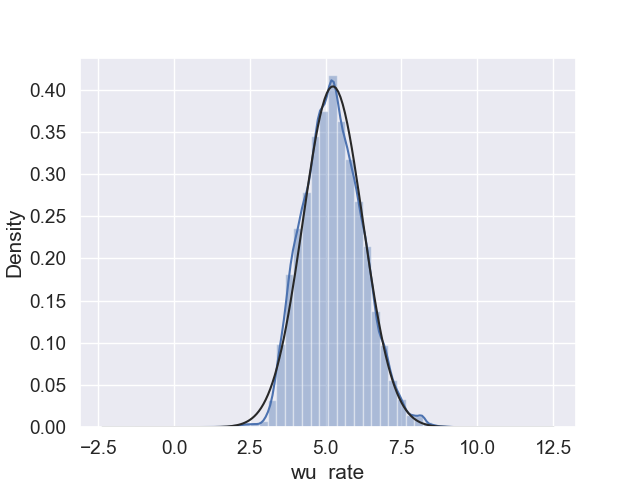

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
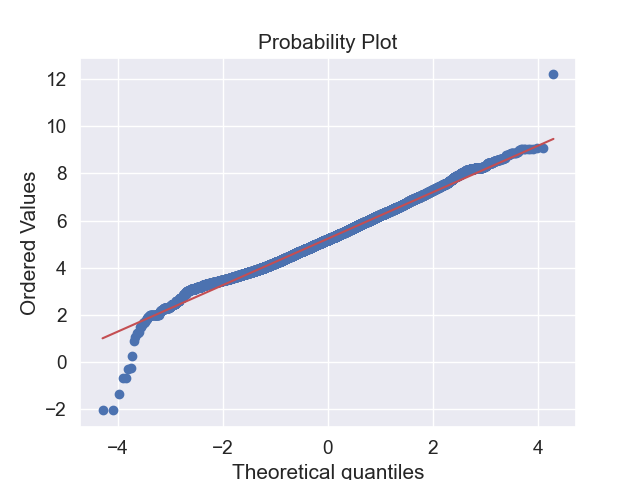

In [86]:
plt.figure()
sns.distplot(np.log10(df_train[target]), fit = norm);
fig = plt.figure()
res = stats.probplot(np.log10(df_train[target]), plot=plt)

C:\anaconda\envs\ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
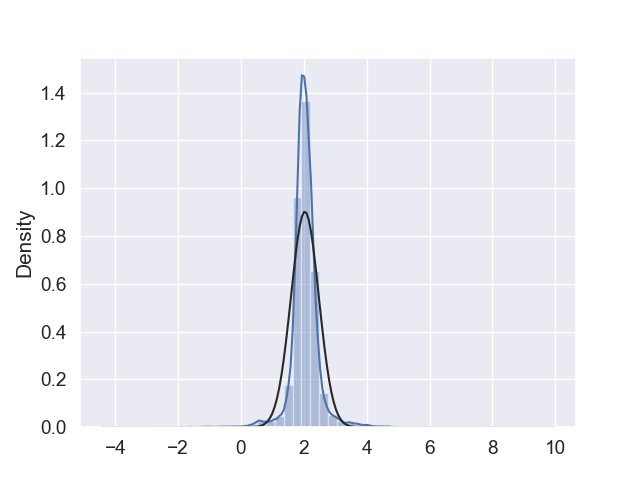

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
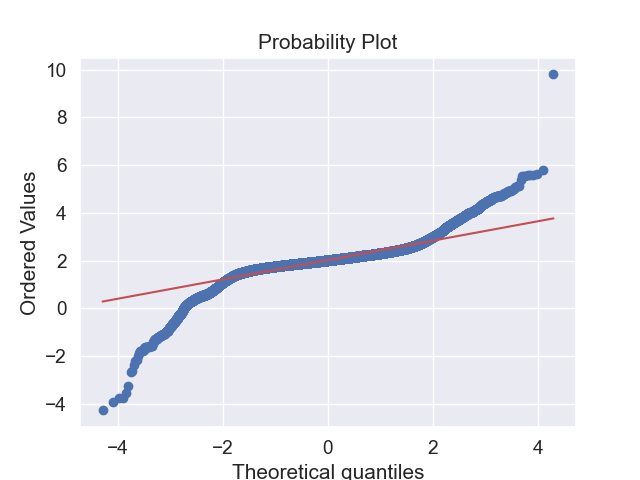

In [91]:
plt.figure()
sns.distplot(np.log10(df_train[target]/df_train[pop_field]), fit = norm);
fig = plt.figure()
per_Capita = np.log10(df_train[target]/df_train[pop_field])
per_Capita = per_Capita[~per_Capita.isna()]

res = stats.probplot(per_Capita, plot=plt)

## Exploring Monthly Data

## Exploring Daily Data